In [1]:
from Bio import AlignIO
from Bio import SeqIO 
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import os

In [2]:
fasta1 = '/home/davidsong/4220_final/bat_seq/S/DQ084199_S.fasta'
fasta2 = '/home/davidsong/4220_final/bat_seq/S/GU190215_S.fasta'

In [3]:
codon_table = {
        'A': ('GCT', 'GCC', 'GCA', 'GCG'),
        'C': ('TGT', 'TGC'),
        'D': ('GAT', 'GAC'),
        'E': ('GAA', 'GAG'),
        'F': ('TTT', 'TTC'),
        'G': ('GGT', 'GGC', 'GGA', 'GGG'),
        'H': ('CAT', 'CAC'),
        'I': ('ATT', 'ATC', 'ATA'),
        'K': ('AAA', 'AAG'),
        'L': ('TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'),
        'M': ('ATG',),
        'N': ('AAT', 'AAC'),
        'P': ('CCT', 'CCC', 'CCA', 'CCG'),
        'Q': ('CAA', 'CAG'),
        'R': ('CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'),
        'S': ('TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'),
        'T': ('ACT', 'ACC', 'ACA', 'ACG'),
        'V': ('GTT', 'GTC', 'GTA', 'GTG'),
        'W': ('TGG',),
        'Y': ('TAT', 'TAC')
    }

In [4]:
hydropathy = {
    'I': 4.5,
    'V': 4.2,
    'L': 3.8,
    'F': 2.8,
    'C': 2.5,
    'M': 1.9,
    'A': 1.8,
    'G': -0.4,
    'T': -0.7,
    'S': -0.8,
    'W': -0.9,
    'Y': -1.3,
    'P': -1.6,
    'H': -3.2,
    'E': -3.5,
    'Q': -3.5,
    'D': -3.5,
    'N': -3.5,
    'K': -3.9,
    'R': -4.5
}

In [5]:
def translate_fasta(fasta):
    f = SeqIO.parse(fasta, 'fasta')
    list_aa = []
    for row in f:
        codons = [str(row.seq[i:i+3]) for i in range(0, len(row.seq), 3)]
        list_aa = []
        for c in codons:
            list_aa += [key for key, value in codon_table.items() if c in value]
    return list_aa

In [6]:
def get_hydrophobicity_values(aa):
    hydropathy_list = []
    for row in aa:
        hydropathy_list.append(hydropathy[row])
    return hydropathy_list

In [7]:
def plot_hydrophilicity_curve(start, end, fasta1, fasta2):
    aa1 = translate_fasta(fasta1)
    aa2 = translate_fasta(fasta2)
    y1 = get_hydrophobicity_values(aa1)
    y2 = get_hydrophobicity_values(aa2)
    x = list(range(start, end))
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle("Hydrophilicity plot comparisons")
    ax1.plot(x, y1[start:end])
    ax1.set_xlabel(os.path.basename(fasta1))
    ax2.plot(x, y2[start:end])
    ax2.set_xlabel(os.path.basename(fasta2))

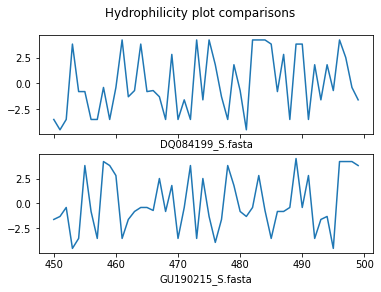

In [8]:
plot_hydrophilicity_curve(450, 500, fasta1, fasta2)